# Exploratory Data Analysis - Sports

# Task 5
Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

# Problems
1. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
2. Suggest teams or players a company should endorse for its products.

# Data Insights

1. 2011, 2012, and 2013 has highest number of matches
2. Mumbai Indians is the top IPL team and Chennai Superkings second.
3. Bowl First team have more chance of winning.
4. Winning toss team choose to feild first.
5. In finals Field first have more chance of winning
6. In finals toss winning choose field first.
7. CH gayle and AB de villers are the top IPL players
8. Shikar Dhawan hit most Four in IPL
9. CH gayle hit most Six in IPL
10. Virat Kholi hit maximum runs in IPL
11. Sk Raina played maximum matchs
12. Caught Out is most common type of out in IPL
13. SL Malinga take maximum wickets

In [1]:
# Importing Import Libraries

import os 
import csv
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Uploading

In [2]:
file_del = r'E:\Internship SparkFoundation\deliveries.csv'
file_mat = r'E:\Internship SparkFoundation\matches.csv'

data_del = pd.read_csv(file_del)
data_mat = pd.read_csv(file_mat)

In [3]:
data_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
data_mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Null Values

In [5]:
null_del = data_del.isnull()
sum_del = null_del.sum()
sum_del

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [6]:
null_mat = data_mat.isnull()
sum_mat = null_mat.sum()
sum_mat

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
data_season = data_mat[['id','season','winner']]

data_complete = data_del.merge(data_season, how ='inner', left_on = 'match_id',right_on = 'id')

In [8]:
data_mat.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [9]:
data_mat = data_mat.drop(columns = ['umpire3'], axis = 1)

data_mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [10]:
winner_season = data_mat.groupby('season')['winner'].value_counts()

winner_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

# Counts Number of Matches per Season

<AxesSubplot:xlabel='season', ylabel='count'>

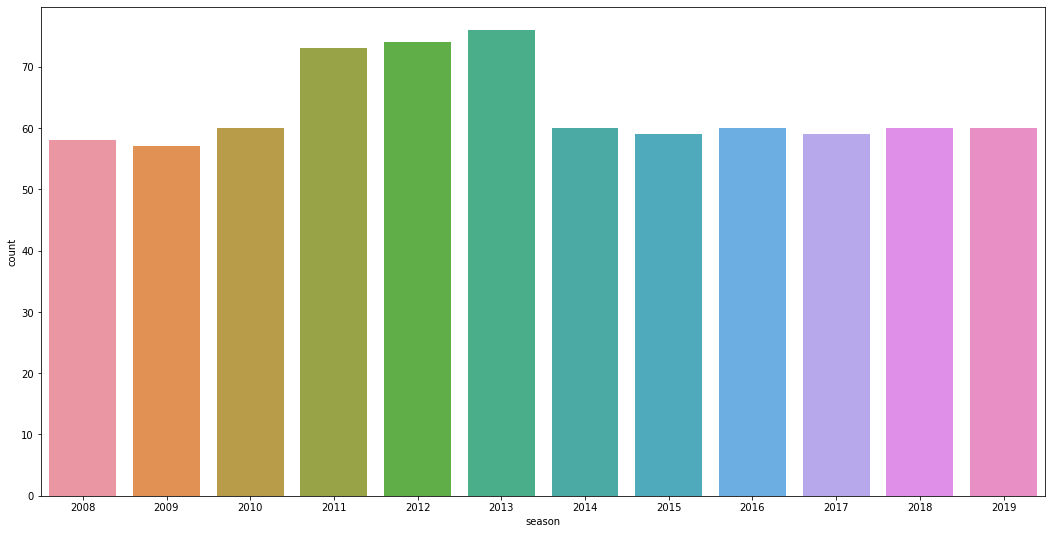

In [11]:
plt.figure(figsize = (18,9))
sns.countplot(x = 'season', data = data_mat)

# Maximum Winnings

<AxesSubplot:xlabel='winner', ylabel='count'>

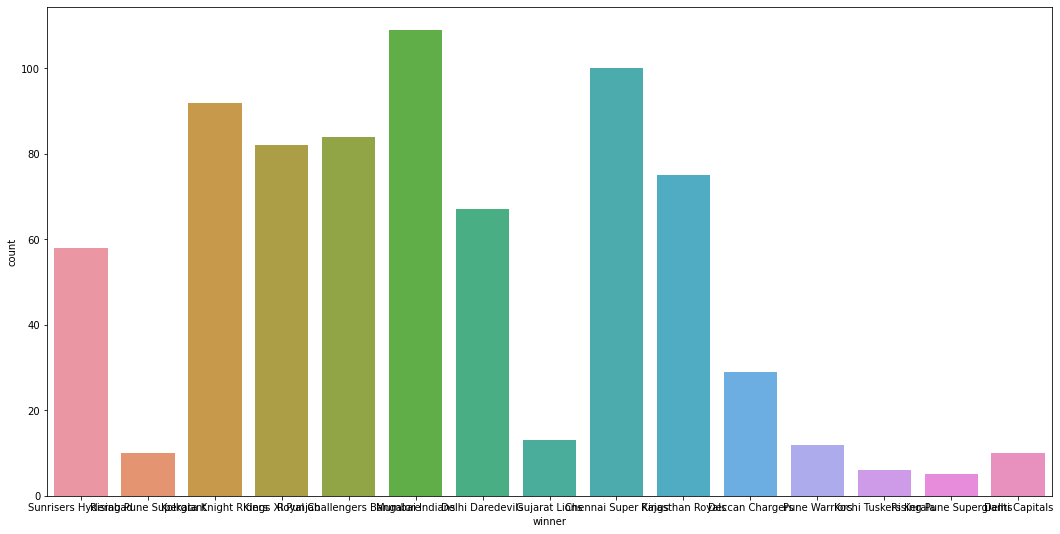

In [12]:
plt.figure(figsize = (18,9))
sns.countplot(x = 'winner', data = data_mat)

# Winning on the bases of First Bat or First Bowl

In [13]:
data_mat['win_by'] = np.where(data_mat['win_by_runs']> 0,'Bat first', 'Bowl first')

([<matplotlib.patches.Wedge at 0x203deeafc10>,
 [Text(-0.18650960840616387, 1.084072952329399, 'Bowl first'),
  Text(0.18650950690792828, -1.0840729697916842, 'Bat first')],
 [Text(-0.10173251367608938, 0.5913125194523995, '55.4%'),
  Text(0.10173245831341542, -0.5913125289772821, '44.6%')])

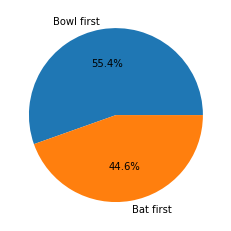

In [14]:
win = data_mat.win_by.value_counts()
x = win.values
labels = win.index

plt.pie(x , labels = labels, autopct = '%1.1f%%')

<AxesSubplot:xlabel='season', ylabel='count'>

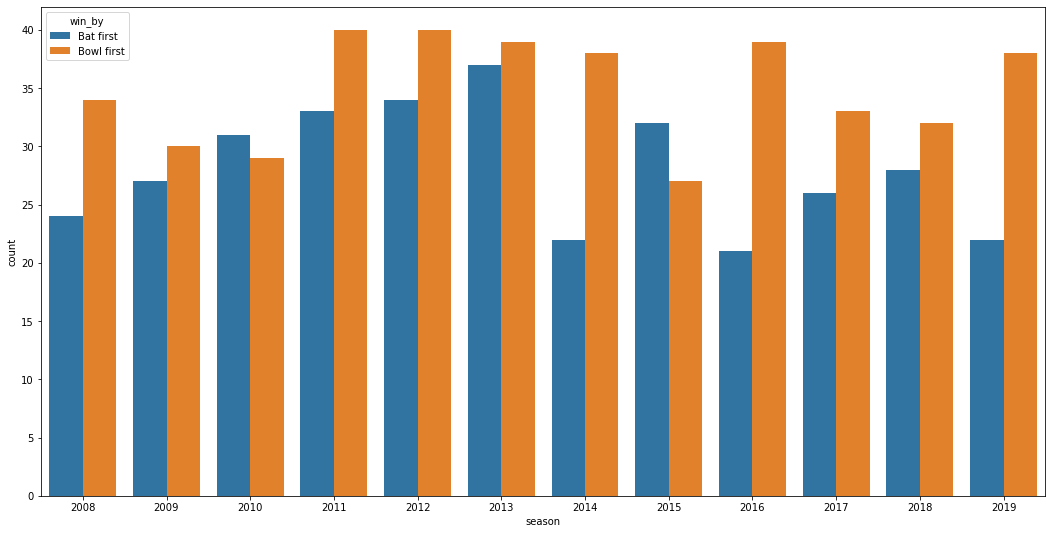

In [15]:
plt.figure(figsize = (18,9))
sns.countplot('season', hue = 'win_by', data = data_mat)

# Winning on the bases of Toss Decision

([<matplotlib.patches.Wedge at 0x203df676520>,
 [Text(-0.3805142883934777, 1.032089567977705, 'field'),
  Text(0.3805142883934778, -1.032089567977705, 'bat')],
 [Text(-0.20755324821462415, 0.5629579461696571, '61.2%'),
  Text(0.20755324821462423, -0.5629579461696571, '38.8%')])

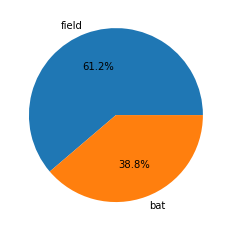

In [16]:
toss = data_mat.toss_decision.value_counts()
x = toss.values
labels = toss.index

plt.pie(x, labels = labels, autopct = '%1.1f%%')

Text(0.5, 1.0, 'Winning by  Toss Decision')

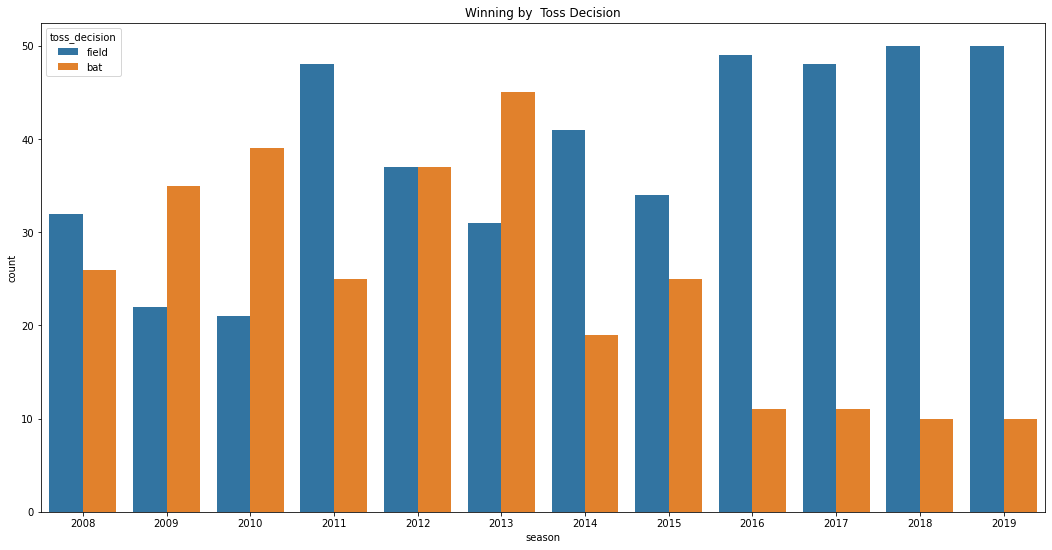

In [17]:
plt.figure(figsize = (18,9))
sns.countplot('season', hue = 'toss_decision', data = data_mat).set_title('Winning by  Toss Decision')

# Season wise Winners

In [18]:
final_winner = data_mat.drop_duplicates(subset = ['season'], keep = 'last')
final_winner[['season', 'winner']].reset_index(drop = True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


# Top Players

Text(0.5, 1.0, 'Top Players in the IPL')

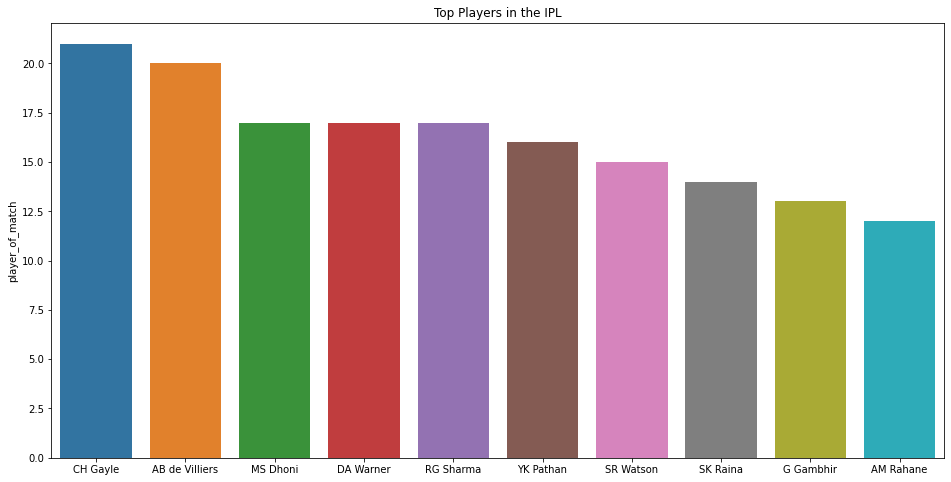

In [19]:
plt.figure(figsize = (16,8))
x = data_mat.player_of_match.value_counts()[:10].index
y = data_mat.player_of_match.value_counts()[:10]
sns.barplot(x, y).set_title('Top Players in the IPL')

# City wise Winning

In [20]:
final_winner.groupby(['city','winner']).size()


city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

# Season's won by Teams

In [21]:
final_winner['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [22]:
final_winner[['toss_winner', 'toss_decision', 'winner']].reset_index(drop = True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


# Man of the Match

In [23]:
final_winner[['winner','player_of_match']].reset_index(drop = True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


# Counting Numbers of Fours and Sixs Team wise and Player Wise

In [24]:
# Counting fours team wise
four_data = data_complete[data_complete['batsman_runs'] == 4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('four', 'count')])

,runs by fours,four
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


Text(0.5, 1.0, 'Number of fours hit by players')

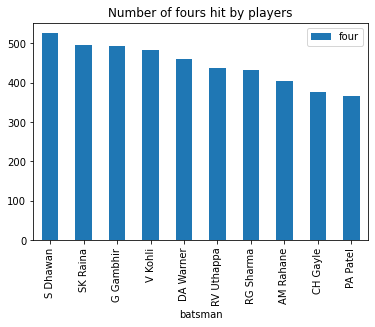

In [25]:
# Counting four Player wise

x = four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four', ascending = 0)
x.iloc[:10,:].plot('batsman','four', kind = 'bar')
plt.title('Number of fours hit by players')

Text(0.5, 1.0, 'Number of fours hit in seasons')

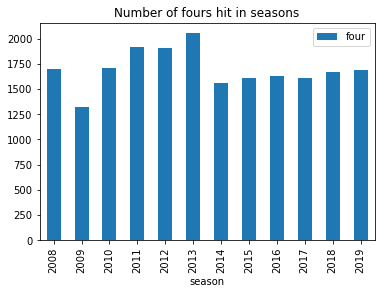

In [26]:
# Counting fours in seasons

x = four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season', 'four', kind = 'bar')
plt.title('Number of fours hit in seasons')

In [27]:
# Counting Sixes hit by teams

six_data = data_complete[data_complete['batsman_runs'] == 6]
six_data.groupby('batting_team')['batsman_runs'].agg([('run by six', 'sum'), ('sixes','count')])

,run by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


Text(0.5, 1.0, 'Number of six hit by players')

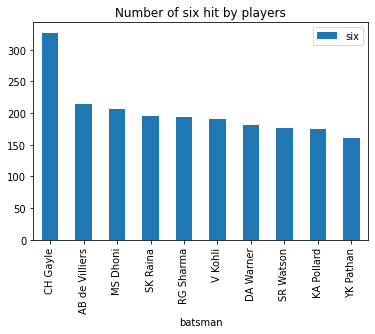

In [28]:
# Counting six hit by players

x = six_data.groupby('batsman')['batsman_runs'].agg([('six', 'count')]).reset_index().sort_values('six', ascending = 0)
x.iloc[:10,:].plot('batsman','six', kind = 'bar')
plt.title('Number of six hit by players')

Text(0.5, 1.0, 'Number of six hit is each season')

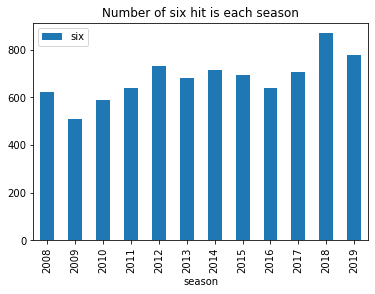

In [29]:
# Counting six hit by in seasons

x = six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six', kind = 'bar')
plt.title('Number of six hit is each season')

# Top 10 leading run scorer in IPL

In [30]:
batsman_score = data_del.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending = False).reset_index(drop = True)
batsman_score = batsman_score.rename(columns = {'sum': 'batsman_runs'})
print('Top 10 Leading Run  Scores in IPL')
batsman_score.iloc[:10,:]

Top 10 Leading Run  Scores in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [31]:
no_match = data_del[['match_id','player_dismissed']]
no_match = no_match.groupby('player_dismissed')['match_id'].count().reset_index().sort_values(by = 'match_id',ascending = False).reset_index(drop = True)

no_match.columns = ['batsman','No_of_Matches']
no_match.head()

,batsman,No_of_Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


# Most wicket taking by bowlers

In [36]:
wicket_data = data_del.dropna(subset = ['dismissal_kind'])
wicket_data = wicket_data[~wicket_data['dismissal_kind'].isin(['run_out','retired hurt','obstructing the field'])]

wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count', ascending = False).reset_index(drop = True).iloc[:10,:]

,bowler,count
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127
